# Music Machine Learning - Probability basics

### Author: Philippe Esling (esling@ircam.fr)

In this course we will cover
1. An explanation on [simple probability](#probability) concepts
2. A review of the axioms and definitions of probability [theory](#theory)
3. An discussion on [conditional probability](#conditional) and independence

<a id="probability"> </a>

## Understanding probability

The field of probability aims to model random or uncertain events. We usually refer to random events when we cannot predict the outcome of a phenomenon with absolute certainty. Maybe the simplest and most iconic case of randomness that everyone has encoutered is to _flip a coin_. In that case, we are uncertain of the result, and might see randomness as a way of expressing this uncertainty.

Hence, a random variable $X$ denotes a quantity that is uncertain, such as the result of an experiment (flipping a coin) or the measurement of an uncertain property (the weather of tomorrow). However, if we can observe a sufficiently large set of _samples_ $\{\mathbf{x}_{i}\}_{i=1}$, it might take different values on each occasion, but some values may occur more often than others. Hence, we can start reasoning on these random events from a different perspective. If the coin is fair, and do not have access to any external information, we expect the _probability_ of the result to be heads 1 times out of 2, or equivalently 50\% of the times. Here, the use of percentage informs us on one of the interpretation of probability, as the _relative frequency_ of events. By repeatedly flipping the coin and observing the results, we can count the occurrence of each outcome.

To understand these concepts graphically, we will rely on `numpy` and `matplotlib`

In [7]:
import random
import matplotlib.pyplot as plt
import numpy as np

## Definitions
Let's start with some basic definitions and principles.
- An ***experiment*** or ***trial*** is an action with an uncertain outcome, such as tossing a coin.
- A ***sample space*** is the set of all possible outcomes of an experiment. In a coin toss, there's a set of two possible oucomes (*heads* and *tails*).
- A ***sample point*** is a single possible outcome - for example, *heads*)
- An ***event*** is a specific outome of single instance of an experiment - for example, tossing a coin and getting *tails*.
- ***Probability*** is a value between 0 and 1 that indicates the likelihood of a particular event, with 0 meaning that the event is impossible, and 1 meaning that the event is inevitable. In general terms, it's calculated like this:

$$
\begin{equation}
\text{probability of an event} = \frac{\text{Number of sample points that produce the event}}{\text{Total number of sample points in the sample space}} 
\end{equation}
$$

For example, the probability of getting *heads* when tossing as coin is <sup>1</sup>/<sub>2</sub> - there is only one side of the coin that is designated *heads*. and there are two possible outcomes in the sample space (*heads* and *tails*). So the probability of getting *heads* in a single coin toss is 0.5 (or 50% when expressed as a percentage).

In [18]:
vals = ['heads', 'tails']
trials = 5
for t in range(trials):
    # Get a random 0 or 1
    toss = random.randint(0,1)
    # Print the result of our toss
    print('Coin is tossed on ' + vals[toss])

Coin is tossed on tails
Coin is tossed on tails
Coin is tossed on tails
Coin is tossed on tails
Coin is tossed on tails


If we run the previous code several times, we will always get different (uncertain) results, showing the underlying randomness. However, if we start simulating (_sampling_) this _experiment_ a certain number of times, we can start to look at the _distribution_ of _events_ 

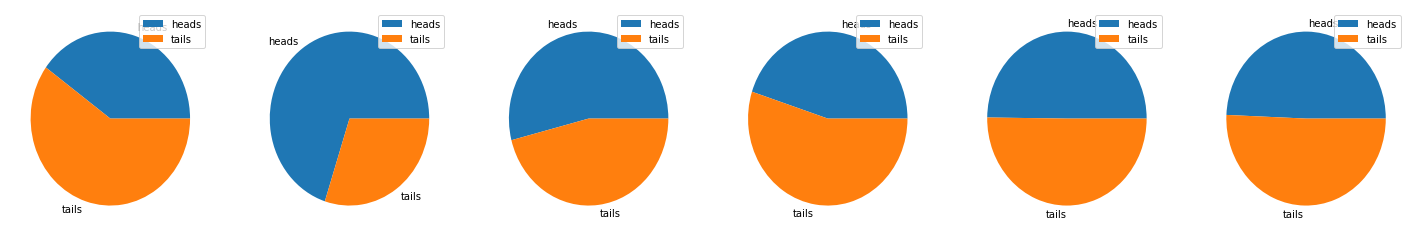

In [19]:
plt.figure(figsize=(25,4))
# loop through 5,10,50,100,1000,10000 trials
for t_id, trials in enumerate([5,10,50,100,1000,10000]):
    # Keep track
    heads_or_tails = [0, 0]
    for t in range(trials):
        # Get a random 0 or 1
        toss = random.randint(0,1)
        # Increment the list element corresponding to the toss result
        heads_or_tails[toss] = heads_or_tails[toss] + 1
    # Show a pie chart of the results
    plt.subplot(1, 6, t_id+1)
    plt.pie(heads_or_tails, labels=['heads', 'tails'])
    plt.legend()
plt.show()

### A more complicated example

Let us look at another slightly more complicated example, where we have two dice, hoping to get a particular number. The dice throw itself is an *experiment*, as you will not know the outome until the dice has been thrown. In this case, the *sample space* of all possible outcomes is every combination of two dice - 36 *sample points*:
<table style='font-size:36px;'>
<tr><td>&#9856;+&#9856;</td><td>&#9856;+&#9857;</td><td>&#9856;+&#9858;</td><td>&#9856;+&#9859;</td><td>&#9856;+&#9860;</td><td>&#9856;+&#9861;</td></tr>
<tr><td>&#9857;+&#9856;</td><td>&#9857;+&#9857;</td><td>&#9857;+&#9858;</td><td>&#9857;+&#9859;</td><td>&#9857;+&#9860;</td><td>&#9857;+&#9861;</td></tr>
<tr><td>&#9858;+&#9856;</td><td>&#9858;+&#9857;</td><td>&#9858;+&#9858;</td><td>&#9858;+&#9859;</td><td>&#9858;+&#9860;</td><td>&#9858;+&#9861;</td></tr>
<tr><td>&#9859;+&#9856;</td><td>&#9859;+&#9857;</td><td>&#9859;+&#9858;</td><td>&#9859;+&#9859;</td><td>&#9859;+&#9860;</td><td>&#9859;+&#9861;</td></tr>
<tr><td>&#9860;+&#9856;</td><td>&#9860;+&#9857;</td><td>&#9860;+&#9858;</td><td>&#9860;+&#9859;</td><td>&#9860;+&#9860;</td><td>&#9860;+&#9861;</td></tr>
<tr><td>&#9861;+&#9856;</td><td>&#9861;+&#9857;</td><td>&#9861;+&#9858;</td><td>&#9861;+&#9859;</td><td>&#9861;+&#9860;</td><td>&#9861;+&#9861;</td></tr>
</table>

The *event* you want to happen is throwing a 7. There are 6 *sample points* that could produce this event:

<table style='font-size:36px;'>
<tr><td>&#9856;+&#9861;</td><td>&#9857;+&#9860;</td><td>&#9858;+&#9859;</td><td>&#9859;+&#9858;</td><td>&#9860;+&#9857;</td><td>&#9861;+&#9856;</td></tr>
</table>

The *probability* of throwing a 7 is therefore <sup>6</sup>/<sub>36</sub> which can be simplified to <sup>1</sup>/<sub>6</sub> or approximately 0.167 (16.7%).

<a id="theory"> </a>
## Probability theory

Probability theory defines the mathematical framework that allows to describe and analyze random phenomena, regardless of the interpretation of probability that we prefer. To rely on this framework, we starts by assuming few axioms of probability. We postulate a set of possible events $\Omega$ called the *sample space* (in our coin toss example, we would have $\Omega = \{Heads, Tails\}$. We can define a _probability measure_ $p(\omega)$ to an event $\omega\in\Omega$, which gives a value between 0 (very unlikely) and 1 (very probable) that shows how likely the event is. In our previous example, we could write that the probability of throwing a 7 is expressed as

$$
p(\omega = 7) = 0.167
$$

where our sample space is defined as $\Omega = \{2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12\}$

### Axioms of probability
The foundation of probability theory is defined in these axioms, on which we can develop tools and techniques to calculate probabilities of different events.

- For any event $\omega\in\Omega$, $0\leq p(\omega) \leq 1$.
- Probability of the sample space $\Omega$ is $p(\Omega)=1$.
- For a set of \textit{disjoint} events $\omega_1,\cdots,\omega_n$ we have $p(\bigcup_{i=1}^{n} \omega_i)=\sum_{i=1}^{n} \omega_{i}$

The first axiom is quite straightforward and states that probability is measured in the interval $[0,1]$. The second axiom states that the probability of the whole sample space is equal to one, as it contains all possible outcomes of our random experiment. For instance, in our coin toss, the outcome will always be either $Heads$ or $Tails$, and therefore will always be contained in $\Omega$. Finally, the third axioms state that for two disjoint events, the probability of one or the other to happen is the sum of their individual probabilities.


### Complement of an event
The *complement* of an event is the set of *sample points* that do ***not*** result in the event. If we follow our previous example, suppose that we want to know what is the probability of **not** throwing a 7. The *complement* of the event (throwing a 7) is all of the possible outcomes that **do not** result in throwing a 7. If we were to count all these events, we would find that there are 30 sample points in the complement, so the probability of the complement is <sup>30</sup>/<sub>36</sub> which is <sup>5</sup>/<sub>6</sub> or 0.833.

However, we can also note that the probability of an event and the probability of its complement ***always add up to 1***. This can be written as

$$
p(\bar{\omega}) = 1 - p(\omega)
$$

This fact can be useful in some cases. For example, suppose you throw two dice and want to know the probability of throwing more than 4. You *could* count all of the outcomes that would produce this result, but there are a lot of them. It might be easier to identify the ones that *do not* produce this result (in other words, the complement).

<a id="conditional"> </a>
## Conditional Probability and dependence
Events can be:
- *Independent* (events that are not affected by other events)
- *Dependent* (events that are conditional on other events)
- *Mutually Exclusive* (events that can't occur together)

### Independent Events
Imagine you toss a coin. The sample space contains two possible outomes: heads or tails. The probability of getting *heads* is <sup>1</sup>/<sub>2</sub>, and the probability of getting *tails* is also <sup>1</sup>/<sub>2</sub>. Imagine we toss a coin and get *heads*. Now, we toss the coin again and get *heads* again. If we were to toss the coin a third time, what is the probability that we get *heads*?

Although you might be tempted to think that a *tail* is overdue, the fact is that each coin toss is an independent event. The outcome of the first coin toss does not affect the second coin toss (or the third, or any number of other coin tosses). For each independent coin toss, the probability of getting *heads* (or *tails*) remains <sup>1</sup>/<sub>2</sub>, or 50%.

### Combining Independent Events
Now, we would like to know the probability of getting three *heads* in a row. Since the probability of a heads on each independent toss is <sup>1</sup>/<sub>2</sub>, you might be tempted to think that the same probability applies to getting three *heads* in a row. But in reality, we need to understand that "getting three *heads* in a row" is a different random event, which is the _combination of three independent events_. To combine independent events like this, we need to multiply the probability of each event. As we know that $p(heads)$ = <sup>1</sup>/<sub>2</sub>, we have

$p(heads, heads, heads)$ = <sup>1</sup>/<sub>2</sub> x <sup>1</sup>/<sub>2</sub> x <sup>1</sup>/<sub>2</sub>

So the probability of tossing three *heads* in a row is 0.5 x 0.5 x 0.5, which is 0.125 (or 12.5%). You can simulate this behavior with the following code.

In [6]:
import random
# Count the number of 3xHeads results
h3 = 0
# loop through 10000 trials
trials = 10000
for t in range(trials):
    trial = trial + 1
    # Flip three coins
    result = ['H' if random.randint(0,1) == 1 else 'T',
              'H' if random.randint(0,1) == 1 else 'T',
              'H' if random.randint(0,1) == 1 else 'T']
    # If it's three heads, add it to the count
    h3 = h3 + int(result == ['H','H','H'])
# What proportion of trials produced 3x heads
print ("Proportion of 3 heads : %.2f%%" % ((h3/trials)*100))

Proportion of 3 heads : 13.07%


The output shows the percentage of times a trial resulted in three heads (which should be somewhere close to 12.5%).

#### Combined Event Probability Notation
When calculating the probability of combined events, we assign a letter such as **A** or **B** to each event, and we use the *intersection* (**&cap;**) symbol to indicate that we want the combined probability of multiple events. So we could assign the letters **A**, **B**, and **C** to each independent coin toss in our sequence of three tosses, and express the combined probability like this:

\begin{equation}p(A \cap B \cap C) = p(A) \times p(B) \times p(C) \end{equation}

Imagine you have created a new game that mixes coin-tossing and die-rolling. The objective of the game is to roll a die and get *6*, and toss a coin and get *heads*. On each turn of the game, a player rolls the die and tosses the coin. There are two independent events required to win: a die-roll of *6* (which we'll call event **A**), and a coin-toss of *heads* (which we'll call event **B**). Our formula for combined independent events is:

\begin{equation}p(A \cap B) = p(A) \times p(B) \end{equation}

The probablilty of rolling a *6* on a fair die is <sup>1</sup>/<sub>6</sub> or 0.167;  and the probability of tossing a coin and getting *heads* is <sup>1</sup>/<sub>2</sub> or 0.5:

\begin{equation}p(A \cap B) = 0.167 \times 0.5 = 0.083 \end{equation}

So on each turn, there's an 8.3% chance to win the game.

### Dependent events

In some cases, random events might be dependent. For instance, in the case of a dice, we can have the event $a=$"*getting an even number*" and $b=$"*rolling a 6*". If we *observe* event $a$, it will modify the probability of event $b$. This is given by the _conditional probability_ $p(b\vert a)$. We can also compute the full joint probability of both events as

$$
p(a,b)=p(a\vert b)p(b)
$$

Note that joint probabilities are symmetrical, which means that $p(a,b)=p(b,a)$ and also
$$
p(a,b) = p(a\vert b)p(b) = p(b\vert a)p(a) = p(b,a)
$$

In the case of our dice rolling, we have that $p(b=6 \vert a=even)=1/3$. Interestingly, this leads to
$$
p(b = 6, a = even) = p(b=6 \vert a=even)p(a=even) = 1/3 * 1/2 = 1/6
$$

which is our original probability of getting a 6. To summarize our discussion on dependence, you can note that _independent events_ will **not** be conditionned on each others, which means that $p(a \vert b) = p(a)$ and also $p(a, b) = p(a)p(b)$.